# Modelo de Representacion


PPT 7 pag 112 - 152

## **Visto la clase anterior** ¿Qué es un **modelo lingüístico**?

Un **modelo lingüístico** (language model) es una herramienta que **entiende o predice texto**. Su objetivo es modelar el lenguaje humano. Por ejemplo:

📌 *"Dado que ya escribí 'La inteligencia artificial es...', ¿cuál es la siguiente palabra más probable?"*

Los modelos lingüísticos aprenden patrones del lenguaje a partir de grandes cantidades de texto. Se utilizan en:

* Traducción automática
* Chatbots
* Autocompletado
* Generación de texto
* Clasificación de sentimientos, etc.

---

## Modelo de Representación del Texto

Cuando trabajamos con texto en Inteligencia Artificial o Machine Learning, tenemos que **convertir las palabras en números** (porque los modelos no entienden letras). Una de las formas más simples y populares para esto es:

---

### 📦 Modelo de Bolsa de Palabras (Bag of Words - BOW)

Este modelo **ignora el orden** de las palabras. Solo le importa **cuántas veces aparece cada palabra** en el texto.

#### Ejemplo:

Texto:

> "Era el mejor de los tiempos, era el peor de los tiempos, era la edad de la sabiduría, era la edad de la insensatez".

Después de eliminar las palabras vacías (como “el”, “de”, “la”...), nos quedamos con palabras más significativas:

| Palabra    | Frecuencia |
| ---------- | ---------- |
| era        | 2          |
| mejor      | 1          |
| peor       | 1          |
| edad       | 2          |
| sabiduría  | 1          |
| insensatez | 1          |
| tiempos    | 2          |

Esto es una **representación numérica del texto** que los algoritmos pueden usar.

---

### 📊 Matriz de Términos-Documentos (DTM) y TDM

Supongamos que tienes **varios documentos**. Queremos construir una tabla (matriz) donde:

* **Filas** = documentos
* **Columnas** = palabras del vocabulario

| Palabra \ Documento | Doc. 1 | Doc. 2 | Doc. 3 |
| ------------------- | ------ | ------ | ------ |
| learning            | 2      | 1      | 1      |
| intelligence        | 1      | 0      | 0      |
| machine             | 1      | 1      | 3      |
| ...                 | ...    | ...    | ...    |

> 📌 Esta tabla se llama **DTM (Document-Term Matrix)**
> Si intercambias filas y columnas → se llama **TDM (Term-Document Matrix)**

---

## 📏 Frecuencia de Término (TF – Term Frequency)

TF mide **qué tan frecuente** es una palabra dentro de un documento específico.

### Fórmula:

$$
\text{TF(palabra, documento)} = \frac{\text{Frecuencia de la palabra}}{\text{Cantidad total de palabras del documento}}
$$

#### Ejemplo:

Doc. 1: "learning intelligence machine learning statistics"
→ Tiene 5 palabras

* **learning** aparece 2 veces → 2 / 5 = **0.4**
* **intelligence** → 1 / 5 = **0.2**
* ...

✅ Esto se hace para **cada palabra en cada documento**.

---

## 📉 Frecuencia Inversa de Documento (IDF – Inverse Document Frequency)

No todas las palabras son igual de importantes. Algunas aparecen en **todos los documentos** ("aprendizaje", "máquina") y otras son más **raras** ("inteligencia", "estadística").

### Fórmula:

$$
\text{IDF(palabra)} = \log \left( \frac{\text{Número total de documentos}}{\text{Número de documentos que contienen la palabra}} \right)
$$

#### Ejemplo:

Supón que hay 3 documentos:

* Si **"aprendizaje"** aparece en los 3 documentos:

  $$
  \text{IDF(aprendizaje)} = \log(3 / 3) = \log(1) = 0
  $$
* Si **"inteligencia"** aparece solo en 1 documento:

  $$
  \text{IDF(inteligencia)} = \log(3 / 1) = \log(3) ≈ 0.48
  $$

✅ Las palabras raras tienen IDF más alto. Las comunes, IDF bajo o 0.

---

## 🧮 TF-IDF = TF × IDF

Combina los dos conceptos:

* **TF**: qué tan frecuente es una palabra en un documento.
* **IDF**: qué tan rara es esa palabra en el corpus completo.

### Fórmula:

$$
\text{TF-IDF(palabra, documento)} = TF(palabra, documento) \times IDF(palabra)
$$

Esto da un valor numérico que **representa la importancia de una palabra en un documento**, considerando todo el corpus.

---


### ✅ Ejemplo Visual del Final

Miremos la imagen:

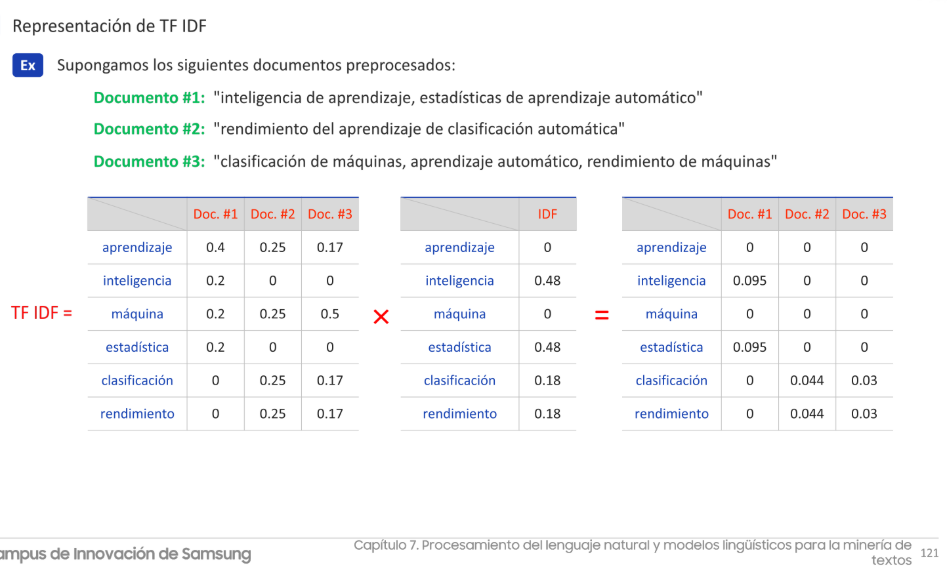



1. A la izquierda tienes los valores de **TF** (frecuencia relativa por documento).
2. En el medio tienes los valores de **IDF** por palabra.
3. A la derecha están los valores de **TF × IDF**, es decir, **TF-IDF**.

Por ejemplo:

* En Doc. 1:

  * **inteligencia** tiene TF = 0.2, IDF = 0.48 → TF-IDF = 0.2 × 0.48 = **0.095**
* Palabras como **"máquina"**, al tener IDF = 0, dan como resultado TF-IDF = 0, sin importar cuántas veces aparezcan.

---

## 📌 ¿Por qué es útil TF-IDF?

Porque permite:

* Saber **qué palabras son realmente importantes** en un documento.
* Ignorar palabras comunes que **no aportan información**.
* Convertir texto en **vectores numéricos** que se pueden usar en modelos de clasificación, clustering, etc.

---

## Ejemplo de Modelo de Representacion

In [1]:
!pip install pandas scikit-learn

In [2]:
import math
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# =======================
# 1. Documentos de ejemplo (ya preprocesados, sin signos ni stopwords)
# =======================
documents = [
    "learning intelligence machine learning statistics",                         # Doc 1
    "machine classification learning performance",                               # Doc 2
    "machine classification machine learning machine performance"                # Doc 3
]

# Nombres opcionales para los documentos (para mostrar en tablas)
doc_names = ["Doc 1", "Doc 2", "Doc 3"]

In [4]:
# =======================
# 2. Tokenizar los documentos (convertir a listas de palabras)
# =======================
tokenized_docs = [doc.split() for doc in documents]

In [5]:
# =======================
# 3. Obtener el vocabulario (palabras únicas ordenadas)
# =======================
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print("Vocabulario:", vocab)

Vocabulario: ['classification', 'intelligence', 'learning', 'machine', 'performance', 'statistics']


In [6]:
# =======================
# 4. Calcular TF (frecuencia de término) para cada palabra en cada documento
# =======================
def compute_tf(doc_words):
    word_counts = Counter(doc_words)
    doc_len = len(doc_words)
    return {word: word_counts[word] / doc_len for word in vocab}

tf_matrix = [compute_tf(doc) for doc in tokenized_docs]

print("\n=== TF (Frecuencia de términos) ===")
for i, tf in enumerate(tf_matrix):
    print(f"{doc_names[i]}:", tf)


=== TF (Frecuencia de términos) ===
Doc 1: {'classification': 0.0, 'intelligence': 0.2, 'learning': 0.4, 'machine': 0.2, 'performance': 0.0, 'statistics': 0.2}
Doc 2: {'classification': 0.25, 'intelligence': 0.0, 'learning': 0.25, 'machine': 0.25, 'performance': 0.25, 'statistics': 0.0}
Doc 3: {'classification': 0.16666666666666666, 'intelligence': 0.0, 'learning': 0.16666666666666666, 'machine': 0.5, 'performance': 0.16666666666666666, 'statistics': 0.0}


In [7]:
# =======================
# 5. Calcular DF (en cuántos documentos aparece cada palabra)
# =======================
def compute_df(tokenized_docs):
    df = {word: 0 for word in vocab}
    for word in vocab:
        for doc in tokenized_docs:
            if word in doc:
                df[word] += 1
    return df

df = compute_df(tokenized_docs)

In [8]:
# =======================
# 6. Calcular IDF (inversa de frecuencia de documento)
# =======================
def compute_idf(df, N):
    return {word: math.log(N / df[word]) for word in vocab}

idf = compute_idf(df, len(documents))

print("\n=== IDF (Frecuencia inversa de documentos) ===")
for word, val in idf.items():
    print(f"{word}: {val:.3f}")


=== IDF (Frecuencia inversa de documentos) ===
classification: 0.405
intelligence: 1.099
learning: 0.000
machine: 0.000
performance: 0.405
statistics: 1.099


In [9]:
# =======================
# 7. Calcular TF-IDF (TF * IDF) para cada documento
# =======================
tfidf_matrix = []

for tf in tf_matrix:
    tfidf = {word: tf[word] * idf[word] for word in vocab}
    tfidf_matrix.append(tfidf)

# Mostrar como tabla
tfidf_df = pd.DataFrame(tfidf_matrix, index=doc_names)
print("\n=== Matriz TF-IDF ===")
print(tfidf_df.round(3))


=== Matriz TF-IDF ===
       classification  intelligence  learning  machine  performance  \
Doc 1           0.000          0.22       0.0      0.0        0.000   
Doc 2           0.101          0.00       0.0      0.0        0.101   
Doc 3           0.068          0.00       0.0      0.0        0.068   

       statistics  
Doc 1        0.22  
Doc 2        0.00  
Doc 3        0.00  


In [10]:
# =======================
# 8. Calcular similitud de coseno entre documentos
# =======================
# Convertir los valores TF-IDF a vectores (listas con el mismo orden del vocabulario)
tfidf_vectors = np.array([
    [tfidf[word] for word in vocab] for tfidf in tfidf_matrix
])

# Calcular matriz de similitud de coseno
similarity_matrix = cosine_similarity(tfidf_vectors)

# Mostrar como tabla
similarity_df = pd.DataFrame(similarity_matrix, index=doc_names, columns=doc_names)
print("\n=== Similitud de coseno entre documentos ===")
print(similarity_df.round(3))



=== Similitud de coseno entre documentos ===
       Doc 1  Doc 2  Doc 3
Doc 1    1.0    0.0    0.0
Doc 2    0.0    1.0    1.0
Doc 3    0.0    1.0    1.0


Excelente pregunta. La **similitud del coseno** te indica **qué tan similares son dos documentos** según el **ángulo entre sus vectores TF-IDF**. El valor va de **0 a 1**:

* **1.0** → Los documentos son **idénticos** (o tienen el mismo patrón de palabras).
* **0.0** → Los documentos son **totalmente distintos** (no comparten ninguna palabra significativa).
* Valores intermedios (ej. 0.5) → Comparten **algo de contenido**, pero no son iguales.

---

#### 🔍 Interpretación:

* **Doc 1 vs Doc 1** = `1.0` → Lógicamente, cualquier documento es idéntico a sí mismo.

* **Doc 1 vs Doc 2 y Doc 3** = `0.0` → No tienen **ninguna palabra significativa en común** (según TF-IDF), así que se consideran completamente diferentes.

* **Doc 2 vs Doc 3** = `1.0` → Tienen **el mismo patrón de palabras importantes** (TF-IDF les asignó valores similares), así que el modelo los ve como **idénticos en contenido**.

---

#### 🧠 ¿Por qué Doc 2 y Doc 3 son idénticos (1.0)?

Porque tienen muchas palabras en común:

```text
Doc 2: machine classification learning performance  
Doc 3: machine classification machine learning machine performance
```

* Aunque Doc 3 repite más la palabra "machine", **TF-IDF normaliza la frecuencia**.
* Ambas comparten: **machine, classification, learning, performance**
* Por eso sus vectores TF-IDF apuntan en la **misma dirección**, y el ángulo entre ellos es 0 → **cos(0°) = 1.0**

---

#### ✅ En resumen:

> **La similitud de coseno mide qué tan alineados están dos documentos en el espacio de palabras importantes.**
> Si el valor es cercano a **1**, significa que **tienen contenido muy parecido**. Si es **0**, significa que **no comparten nada relevante**.

---

## Explicacion del ejemplo

✅ **Resumen general del código**

Este código es un ejemplo de **modelo de representación de texto** usando el enfoque **TF-IDF (Term Frequency - Inverse Document Frequency)**, muy común en procesamiento de lenguaje natural (NLP). Sirve para representar documentos como vectores numéricos y luego comparar su similitud usando la **similitud del coseno**.

---

### 🧠 **Paso a paso explicado**

#### 1. **Entrada: Documentos de ejemplo**

```python
documents = [
    "learning intelligence machine learning statistics",
    ...
]
```

* Se parte de una lista de **3 documentos ya preprocesados** (sin signos ni stopwords).
* Cada documento es un string de palabras clave.

---

#### 2. **Tokenización**

```python
tokenized_docs = [doc.split() for doc in documents]
```

* Se convierte cada string en una **lista de palabras** (tokens).
* Esto es esencial para poder contar palabras después.

---

#### 3. **Construcción del vocabulario**

```python
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
```

* Se obtiene el conjunto de **todas las palabras únicas** de todos los documentos.
* Esto será la **base para las matrices TF y TF-IDF**.

---

#### 4. **Cálculo de TF (Frecuencia de Término)**

```python
def compute_tf(doc_words):
    ...
```

* Para cada documento, se cuenta cuántas veces aparece cada palabra.
* Luego se divide por el total de palabras del documento.
* Resultado: Una **tabla TF** por documento.

✔️ **TF mide la importancia de una palabra en *ese documento***.

---

#### 5. **Cálculo de DF (Frecuencia de Documento)**

```python
def compute_df(tokenized_docs):
    ...
```

* Cuenta en **cuántos documentos distintos** aparece cada palabra.

✔️ **DF mide cuán común es una palabra en toda la colección**.

---

#### 6. **Cálculo de IDF (Inversa de DF)**

```python
def compute_idf(df, N):
    return {word: math.log(N / df[word]) for word in vocab}
```

* Se aplica la fórmula:
  $\text{IDF} = \log\left(\frac{N}{\text{DF}}\right)$
* Cuanto más rara es una palabra (menos documentos la tienen), **mayor será su IDF**.

✔️ **IDF reduce el peso de palabras comunes y destaca las palabras más distintivas**.

---

#### 7. **Cálculo de TF-IDF**

```python
tfidf = {word: tf[word] * idf[word] for word in vocab}
```

* Se multiplica el valor TF de cada palabra por su IDF.
* Resultado: Matriz TF-IDF → cada documento es ahora un **vector numérico**.

✔️ **TF-IDF representa la importancia real de cada palabra en un documento y en el contexto global.**

---

#### 8. **Cálculo de Similitud de Coseno**

```python
similarity_matrix = cosine_similarity(tfidf_vectors)
```

* Se compara cada par de documentos usando **la similitud de coseno** entre sus vectores TF-IDF.
* Resultado: Una **matriz de similitudes** entre 0 y 1 (1 = muy similares).

✔️ **Sirve para medir qué tan parecidos son dos documentos, basado en su contenido.**

---

#### 📊 ¿Qué se obtiene al final?

* Una **matriz TF-IDF**: representación numérica de cada documento.
* Una **matriz de similitud**: comparación entre documentos basada en su significado.

---

#### 🎯 ¿Para qué sirve este tipo de análisis?

* Para buscar documentos similares (ej: buscadores).
* Para clasificar texto, agruparlo o resumirlo.
* Es la **base para muchos modelos de NLP**, como análisis de sentimientos o motores de recomendación.

---

# Analisis de Clasificacioón

## 🧠 ¿Qué es el análisis de clasificación?

Es una técnica de Machine Learning supervisado que se usa para **predecir una categoría** (etiqueta) de una observación.

Por ejemplo:

* ¿Este email es **spam** o **no spam**?
* ¿Esta crítica de película es **positiva** o **negativa**?

---

## 🧪 Clasificador Naive Bayes con modelo BOW (Bolsa de palabras)

### 🔹 ¿Qué es el modelo BOW?

Convierte un documento en un **vector de palabras**, sin importar el orden. Solo interesa **cuántas veces aparece cada palabra**.

### 🔹 ¿Qué es Naive Bayes?

Es un clasificador probabilístico basado en el **Teorema de Bayes**, con el supuesto “naive” de que las palabras son **independientes entre sí** (lo cual no es realista, pero funciona muy bien).

---

### 📘 Ejemplo teórico con BOW y Naive Bayes

Supongamos:

* Clase A: correos **spam**
* Clase B: correos **no spam**

Queremos clasificar un nuevo correo con las palabras: `"ganaste", "gratis", "premio"`

El clasificador calcula:

$$
P(\text{A|palabras}) \propto P(\text{palabras|A}) \cdot P(A)
$$

$$
P(\text{B|palabras}) \propto P(\text{palabras|B}) \cdot P(B)
$$

Y elige la clase con mayor probabilidad.

---

### 🔹 ¿Cómo se calcula?

1. Se cuentan cuántas veces aparece cada palabra en la clase A y en la clase B.
2. Se calculan las probabilidades de cada palabra en cada clase.
3. Para un documento nuevo, se multiplican (o mejor: se **suman logaritmos**) de esas probabilidades.
4. Se compara el resultado de cada clase y se asigna la clase con mayor score.

---

## 🧪 Clasificación usando TF-IDF + Regresión Logística (ejercicio que diste)

### 🔹 ¿Qué hace este código?

1. **Carga documentos** reales de reseñas de películas (`pos` y `neg`).
2. **Limpia el texto** (elimina signos, minúsculas, espacios).
3. **Vectoriza** el texto usando **TF-IDF**, que pesa las palabras según su importancia.
4. **Divide el conjunto de datos** en entrenamiento y prueba.
5. **Entrena un clasificador** (regresión logística).
6. **Evalúa el modelo** usando matriz de confusión y exactitud (accuracy).

---

### 🔍 ¿Qué es TF-IDF?

TF-IDF es un modelo de representación que pondera cada palabra en un documento así:

$$
\text{TF-IDF}(w, d) = TF(w,d) \cdot IDF(w)
$$

* TF: Frecuencia de la palabra en el documento
* IDF: Qué tan rara es la palabra en todos los documentos

---

### 🔍 ¿Qué es regresión logística?

Un modelo matemático que predice la **probabilidad de que algo pertenezca a una clase**, y decide con un umbral (por ejemplo, si > 0.5, se clasifica como positivo).

---

### 📊 ¿Qué significa la matriz de confusión?

Ejemplo de salida:

```
[[82 18]
 [12 88]]
```

* **TP (88)**: positivos bien clasificados
* **TN (82)**: negativos bien clasificados
* **FP (18)**: negativos mal clasificados como positivos
* **FN (12)**: positivos mal clasificados como negativos

---

### ✅ Ventajas comparativas

| Modelo             | Ventajas                                         | Ideal para                                              |
| ------------------ | ------------------------------------------------ | ------------------------------------------------------- |
| Naive Bayes + BOW  | Rápido, simple, eficaz con pocos datos           | Spam, clasificación binaria sencilla                    |
| TF-IDF + Log. Reg. | Más preciso, considera la relevancia de palabras | Reseñas, análisis de sentimientos, textos más complejos |

---

## ✅ En resumen

### 🔹 Clasificador Naive Bayes con BOW:

* Usa conteo de palabras y probabilidades.
* Clasifica basándose en qué tan probables son las palabras dadas cada clase.
* Fácil de implementar y muy rápido.

### 🔹 TF-IDF + Regresión logística:

* Representa el texto como vectores de importancia de palabras.
* Usa un modelo estadístico (regresión) para aprender a predecir clases.
* Requiere más recursos pero puede ser más preciso.

---

## Ejemplo de Analisis de Clasificación

In [11]:
# ================================================
# 0. Importación de librerías necesarias
# ================================================
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')  # Oculta advertencias
nltk.download('stopwords')         # Descarga stopwords en inglés


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# ================================================
#  1. Cargar el dataset de reseñas de películas
# ================================================

# ES MUY PESADO PARA SUBIRLO/CARGARLO DESDE DRIVE, DEMASIADO LENTO

# Si estás usando Google Colab, conecta tu Google Drive
##from google.colab import drive
##drive.mount('/content/drive')

# Cargar reseñas desde subcarpetas "pos" y "neg" dentro de txt_sentoken
# Este dataset contiene reseñas positivas y negativas
##reviews = load_files('txt_sentoken/')
##my_docs, y = reviews.data, reviews.target  # y contiene las etiquetas: 0 = neg, 1 = pos

# Mostrar el total de documentos
##print("Cantidad de documentos:", len(my_docs))

# Mostrar distribución de clases (0: negativo, 1: positivo)
##print(np.unique(y, return_counts=True))

# Visualización rápida
##sns.countplot(x=y).set_title("Distribución de Clases (0 = Neg, 1 = Pos)")
##plt.show()


COMO SUBIRLO DESDE DRIVE ES MUY LENTO voy a subir el archivo review_polarity.tar.gz directamente al entorno de Google Colab

primero se entra a https://www.cs.cornell.edu/people/pabo/movie-review-data/

y se descarga polarity dataset v2.0 (link descarga: https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz)

luego éste se sube a colab.

In [14]:
# Paso 1: Herramienta para subir archivos manualmente a Colab
from google.colab import files
uploaded = files.upload()  # Esto abrirá un botón para que subas el archivo review_polarity.tar.gz


Saving review_polarity.tar.gz to review_polarity.tar.gz


In [15]:
# Paso 2: Descomprimir el archivo .tar.gz
import tarfile

# Suponiendo que el archivo se llama 'review_polarity.tar.gz'
with tarfile.open('review_polarity.tar.gz', 'r:gz') as tar:
    tar.extractall()  # Esto descomprime en /content/txt_sentoken/


In [16]:
# Ahora puedes usar load_files directamente sobre la carpeta descomprimida
from sklearn.datasets import load_files

reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

print("Cantidad de documentos:", len(my_docs))
print(np.unique(y, return_counts=True))


Cantidad de documentos: 2000
(array([0, 1]), array([1000, 1000]))


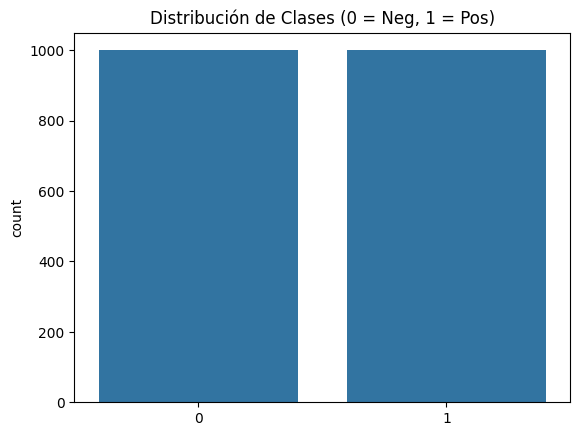

In [17]:
# Visualización rápida
sns.countplot(x=y).set_title("Distribución de Clases (0 = Neg, 1 = Pos)")
plt.show()

In [ ]:
# Limpiar los textos: eliminar signos, pasar a minúsculas, quitar palabras sueltas y espacios extra
corpus = []

for doc in my_docs:
    review = re.sub(r'\W', ' ', str(doc))           # Reemplaza caracteres no alfanuméricos
    review = review.lower()                         # Convierte a minúsculas
    review = re.sub(r'^br$', ' ', review)           # Elimina 'br' que aparece por etiquetas HTML
    review = re.sub(r'\s+br\s+', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ', review)    # Elimina letras sueltas (como 'a', 'b', etc.)
    review = re.sub(r'^b\s+', '', review)           # Elimina prefijos erróneos de bytes (b'...')
    review = re.sub(r'\s+', ' ', review)            # Elimina espacios múltiples
    corpus.append(review)

# Mostrar el primer documento procesado
print(corpus[0])


In [19]:
# ================================================
#  2. Preprocesamiento de texto
# ================================================

# Limpiar los textos: eliminar signos, pasar a minúsculas, quitar palabras sueltas y espacios extra
corpus = []

for doc in my_docs:
    review = re.sub(r'\W', ' ', str(doc))           # Reemplaza caracteres no alfanuméricos
    review = review.lower()                         # Convierte a minúsculas
    review = re.sub(r'^br$', ' ', review)           # Elimina 'br' que aparece por etiquetas HTML
    review = re.sub(r'\s+br\s+', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ', review)    # Elimina letras sueltas (como 'a', 'b', etc.)
    review = re.sub(r'^b\s+', '', review)           # Elimina prefijos erróneos de bytes (b'...')
    review = re.sub(r'\s+', ' ', review)            # Elimina espacios múltiples
    corpus.append(review)

# Mostrar el primer documento procesado
print(corpus[0])


arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse nit hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him nonce again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser nin this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but i

In [20]:
# ================================================
#  3. Representación del texto con TF-IDF
# ================================================

# Crear el vectorizador TF-IDF
TFIDF = TfidfVectorizer(
    max_features=1000,            # Solo considera las 1000 palabras más frecuentes
    min_df=2,                     # Aparece en al menos 2 documentos
    max_df=0.6,                   # Aparece en menos del 60% de los documentos
    stop_words=stopwords.words('english')  # Elimina palabras comunes (stopwords)
)

# Ajustar y transformar el corpus
TFIDF.fit(corpus)
X = TFIDF.transform(corpus).toarray()

# Mostrar tamaño de la matriz de características
print("Matriz TF-IDF:", X.shape)  # (número de documentos, número de palabras seleccionadas)


Matriz TF-IDF: (2000, 1000)


In [21]:
# ================================================
#  4. Entrenamiento y evaluación del modelo
# ================================================

# Dividir los datos en conjunto de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)

# Entrenar un modelo de regresión logística
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = LR.predict(X_test)

# Evaluar con matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_mat)

# Evaluar con precisión (accuracy)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", np.round(acc, 3))


Matriz de confusión:
 [[235  66]
 [ 51 248]]
Precisión del modelo: 0.805


Este código te muestra un flujo completo de clasificación de texto:

- Cargar y preprocesar texto

- Representarlo con TF-IDF

- Aplicar un modelo de clasificación supervisada (Regresión Logística)

- Evaluar con precisión y matriz de confusión

# Modelado de Temas

## 🧠 ¿Qué es el Modelado de Temas (Topic Modeling)?

Es una técnica del Procesamiento de Lenguaje Natural (NLP) que busca **descubrir los temas ocultos** en un conjunto de documentos. No se refiere a títulos explícitos, sino a **conceptos latentes** que se pueden identificar a partir de las palabras que aparecen en los textos.

---

## 🔍 ¿Qué es LSA (Latent Semantic Analysis)?

LSA es una técnica que:

* Usa una representación TF-IDF de los textos.
* Aplica una **descomposición de valores singulares (SVD)** a esa matriz.
* Reduce la dimensionalidad para identificar **temas latentes**, o patrones recurrentes de palabras.

---

## 🧮 ¿Qué es SVD (Descomposición de Valores Singulares)?

La matriz TF-IDF (llamémosla `M`) se descompone en tres matrices:

```
M ≈ U × Σ × Vᵀ
```

* `M`: matriz de documentos vs términos.
* `U`: relación documentos-temas.
* `Σ`: importancia (peso) de los temas (valores singulares).
* `Vᵀ`: relación temas-palabras (lo que usaremos para ver qué palabras representan cada tema).

Usamos una versión truncada (solo los `r` temas más importantes) para evitar ruido y reducir complejidad.

---

## ✨ Aplicaciones de LSA

* Agrupación de documentos (clustering).
* Motores de búsqueda (asociar términos con documentos).
* Análisis semántico y reducción de dimensionalidad.
* Etiquetado de documentos.

---

## 📌 Código Completo con Explicaciones

In [22]:
# ------------------------------------------
# EJERCICIO #0512 - LSA Topic Modeling
# ------------------------------------------

import numpy as np
import warnings
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

warnings.filterwarnings('ignore')  # Oculta advertencias molestas

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# ------------------------------
# 1. Datos de ejemplo (documentos)
# ------------------------------

my_docs = [
    "The economic slowdown is becoming more severe",
    "The movie was simply awesome",
    "I like cooking my own food",
    "Samsung is announcing a new technology",
    "Machine Learning is an example of awesome technology",
    "All of us were excited at the movie",
    "We have to do more to reverse the economic slowdown"
]

# Convertimos todo a minúsculas
my_docs = [doc.lower() for doc in my_docs]

In [24]:
# ------------------------------
# 2. Representación TF-IDF
# ------------------------------

# Podemos agregar nuestras propias stopwords
my_stop_words = ['us', 'like']

vectorizer = TfidfVectorizer(
    max_features=15,        # Solo tomar las 15 palabras más relevantes
    min_df=1,               # Aparecen al menos en 1 documento
    max_df=3,               # Aparecen en no más de 3 documentos
    stop_words=stopwords.words('english') + my_stop_words  # Stopwords en inglés + personalizadas
)

X = vectorizer.fit_transform(my_docs).toarray()  # Matriz TF-IDF

# Mostrar dimensión: (documentos x términos)
print("Shape de matriz TF-IDF:", X.shape)

# Mostrar los términos seleccionados
features = vectorizer.get_feature_names_out()
print("Términos seleccionados:", features)

Shape de matriz TF-IDF: (7, 15)
Términos seleccionados: ['awesome' 'becoming' 'cooking' 'economic' 'example' 'excited' 'food'
 'learning' 'machine' 'movie' 'new' 'reverse' 'samsung' 'slowdown'
 'technology']


In [25]:
# ------------------------------
# 3. Descomposición SVD (LSA)
# ------------------------------

n_topics = 4  # Elegimos 4 temas
svd = TruncatedSVD(n_components=n_topics, n_iter=100)
svd.fit(X)

# Matriz V transpuesta (relación temas vs palabras)
vt = svd.components_
vtabs = np.abs(vt)  # Tomamos valores absolutos

print("Shape de Vᵀ:", vt.shape)

Shape de Vᵀ: (4, 15)


In [26]:
# ------------------------------
# 4. Top Palabras por Tema
# ------------------------------

n_top = 3  # Número de palabras por tema
topic_matrix = []

for i in range(n_topics):
    top_indices = np.argsort(-vtabs[i, :])  # Índices de mayor a menor valor
    top_words = [features[idx] for idx in top_indices[:n_top]]
    topic_matrix.append(top_words)

print("Top palabras por tema:")
for i, words in enumerate(topic_matrix):
    print(f"Tema {i+1}: {words}")

# Podemos nombrar los temas según las palabras
topic_names = ['Economía', 'Cine', 'Tecnología', 'Cocina']

Top palabras por tema:
Tema 1: ['economic', 'slowdown', 'reverse']
Tema 2: ['movie', 'awesome', 'excited']
Tema 3: ['technology', 'new', 'samsung']
Tema 4: ['cooking', 'food', 'technology']


In [28]:
# ------------------------------
# 5. Asignar Tema a Cada Documento
# ------------------------------
nltk.download('punkt_tab')

print("\nDocumentos clasificados por tema predominante:")
for i, doc in enumerate(my_docs):
    score_max = 0
    topic_pick = 0
    tokens = nltk.word_tokenize(doc)

    for j in range(n_topics):
        # Verifica cuántas palabras del tema j están en el documento
        found = [word in topic_matrix[j] for word in tokens]
        score = np.sum(found)
        if score > score_max:
            score_max = score
            topic_pick = j

    print(f"Documento {i+1} ➜ Tema: {topic_names[topic_pick]}")


Documentos clasificados por tema predominante:
Documento 1 ➜ Tema: Economía
Documento 2 ➜ Tema: Cine
Documento 3 ➜ Tema: Cocina
Documento 4 ➜ Tema: Tecnología
Documento 5 ➜ Tema: Cine
Documento 6 ➜ Tema: Cine
Documento 7 ➜ Tema: Economía


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 📝 Notas Finales

* Esta técnica **no es perfecta**, ya que depende mucho de los datos, palabras clave y número de temas.
* A veces se puede etiquetar incorrectamente si el documento es corto o ambiguo.
* Funciona bien para **descubrir patrones generales**, no casos individuales.

---

# Modelado de Temas - Parte 2

#### **Modelado de Temas con LDA**

---

### 🔍 ¿Qué es *Latent Dirichlet Allocation (LDA)*?

**LDA** es un modelo probabilístico de modelado de temas usado para descubrir los "temas ocultos" dentro de un conjunto de documentos. No requiere saber los temas de antemano, los infiere a partir del uso de palabras.

**Fundamentos:**

* Desarrollado por **Blei, Ng y Jordan** (2003).
* Usa razonamiento **inductivo**: parte de los documentos observados (palabras) para deducir las distribuciones de temas.
* Supone que:

  * Cada documento es una mezcla de temas.
  * Cada tema es una distribución de palabras.
* Utiliza distribuciones **Dirichlet** como priors (valores iniciales) para modelar probabilidades.

---

### 🔁 Proceso Generativo (Razonamiento Deductivo)

Este es el proceso *teórico* de cómo se generan los documentos si supiéramos todo:

1. Se elige una distribución de temas para cada documento (Dirichlet).
2. Para cada palabra del documento:

   * Se escoge un tema al azar según esa distribución.
   * Se elige una palabra desde la distribución de palabras de ese tema.

Pero en la vida real, **sólo tenemos los documentos**. LDA trata de **inferir hacia atrás** qué temas los generaron.

---

### 🧠 Inferencia en LDA (Razonamiento Inductivo)

Queremos saber:

* ¿Qué temas tiene cada documento?
* ¿Qué palabras caracterizan cada tema?

Eso se calcula resolviendo:

* La distribución de temas por documento.
* La distribución de palabras por tema.

Esto es lo que hace `LatentDirichletAllocation` de `scikit-learn`.

---

### Codigo ejemplo

In [37]:
# === LDA: Latent Dirichlet Allocation ===

import numpy as np
import warnings
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Para evitar warnings molestos
warnings.filterwarnings('ignore')

In [38]:
# === 1. Datos de entrada: documentos ===
# Simulamos 7 documentos simples
my_docs = [
    "The economic slowdown is becoming more severe",
    "The movie was simply awesome",
    "I like cooking my own food",
    "Samsung is announcing a new technology",
    "Machine Learning is an example of awesome technology",
    "All of us were excited at the movie",
    "We have to do more to reverse the economic slowdown"
]

# Preprocesamiento básico: pasar a minúsculas
my_docs = [doc.lower() for doc in my_docs]

In [39]:
# === 2. Crear representación BOW (DTM) ===
vectorizer = CountVectorizer(
    max_features=15,           # mantener sólo las 15 palabras más frecuentes
    min_df=1,                  # incluir palabras que aparezcan en al menos 1 doc
    max_df=3,                  # excluir palabras que aparezcan en más de 3 docs (filtra stopwords)
    stop_words=list(ENGLISH_STOP_WORDS)  # lista de stopwords de sklearn
)

X = vectorizer.fit_transform(my_docs).toarray()  # Matriz documento-término (DTM)

# Mostrar DTM
print("=== Matriz Documento-Término (DTM) ===")
print(X)

# Mostrar nombres de características
features = vectorizer.get_feature_names_out()
print("\n=== Palabras seleccionadas (features) ===")
print(features)

=== Matriz Documento-Término (DTM) ===
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 1 0 1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]]

=== Palabras seleccionadas (features) ===
['announcing' 'awesome' 'economic' 'example' 'excited' 'food' 'learning'
 'like' 'machine' 'movie' 'new' 'reverse' 'samsung' 'slowdown'
 'technology']


In [40]:
# === 3. Aplicar LDA ===
n_topics = 4  # Suponemos que hay 4 temas en nuestros datos
lda = LatentDirichletAllocation(n_components=n_topics, random_state=123)
my_docs_topic = lda.fit_transform(X)

# Mostrar distribución de temas por documento
print("\n=== Distribución de temas por documento ===")
print(np.round(my_docs_topic, 2))

# Verificar que cada fila suma 1 (probabilidades)
print("\n=== Verificación: cada documento suma 1 ===")
print(np.round(my_docs_topic.sum(axis=1), 2))


=== Distribución de temas por documento ===
[[0.75 0.08 0.08 0.08]
 [0.08 0.09 0.08 0.75]
 [0.08 0.08 0.75 0.08]
 [0.05 0.05 0.85 0.05]
 [0.87 0.04 0.04 0.04]
 [0.08 0.75 0.08 0.09]
 [0.81 0.06 0.06 0.06]]

=== Verificación: cada documento suma 1 ===
[1. 1. 1. 1. 1. 1. 1.]


In [41]:
# === 4. Obtener las palabras más representativas de cada tema ===
topic_composition = lda.components_  # (topics x palabras)
n_top = 3  # Número de palabras clave por tema
topic_matrix = []

for i in range(n_topics):
    top_indices = np.argsort(-topic_composition[i])  # índices con mayor peso
    top_words = [features[j] for j in top_indices[:n_top]]
    topic_matrix.append(top_words)

print("\n=== Palabras principales por tema ===")
for i, topic_words in enumerate(topic_matrix):
    print(f"Tema {i+1}: {topic_words}")


=== Palabras principales por tema ===
Tema 1: ['economic', 'slowdown', 'learning']
Tema 2: ['movie', 'excited', 'awesome']
Tema 3: ['technology', 'announcing', 'new']
Tema 4: ['awesome', 'movie', 'technology']


In [42]:
# === 5. Etiquetar cada documento con su tema dominante ===
topic_names = ['Tecnología', 'Cocina', 'Películas', 'Economía']  # opcional

print("\n=== Tema principal de cada documento ===")
for i in range(len(my_docs)):
    topic_pick = np.argmax(my_docs_topic[i])
    print(f"Documento {i+1}: Tema {topic_pick+1} - {topic_names[topic_pick]}")


=== Tema principal de cada documento ===
Documento 1: Tema 1 - Tecnología
Documento 2: Tema 4 - Economía
Documento 3: Tema 3 - Películas
Documento 4: Tema 3 - Películas
Documento 5: Tema 1 - Tecnología
Documento 6: Tema 2 - Cocina
Documento 7: Tema 1 - Tecnología


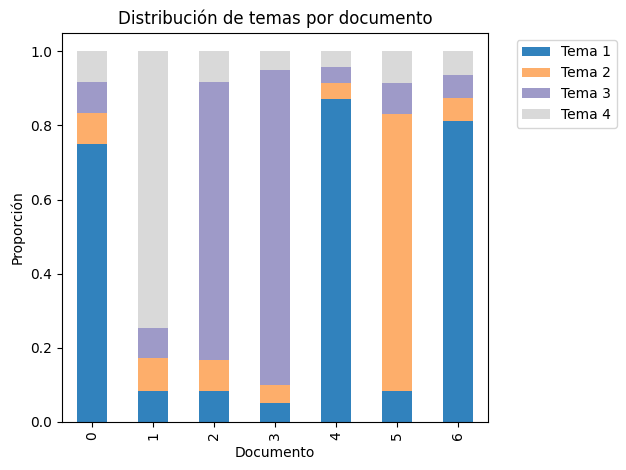

In [43]:
# Visualizar proporción de temas por documento
import pandas as pd

df_topics = pd.DataFrame(my_docs_topic, columns=[f"Tema {i+1}" for i in range(n_topics)])
df_topics.plot(kind='bar', stacked=True, colormap='tab20c')
plt.title("Distribución de temas por documento")
plt.xlabel("Documento")
plt.ylabel("Proporción")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### 🧠 Resumen

| Concepto             | Descripción                                                                    |
| -------------------- | ------------------------------------------------------------------------------ |
| **LDA**              | Algoritmo bayesiano no supervisado para descubrir temas ocultos en documentos. |
| **Dirichlet**        | Distribución previa usada para modelar distribuciones de probabilidad.         |
| **Multinomial**      | Modelo para la ocurrencia de múltiples palabras o temas.                       |
| **Inferencia**       | Proceso de deducir la estructura de temas desde los documentos.                |
| **Output principal** | Distribución de temas por documento y palabras por tema.                       |

---

# Ejercicio de Reconocimiento de correo SPAM

Entrenar un modelo de reconocimiento de correo spam

https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data



In [29]:
# Instalación del cliente kaggle (solo la primera vez)
!pip install kaggle

# Subir tu API token Kaggle (kaggle.json) al entorno de Colab
from google.colab import files
files.upload()  # selecciona el kaggle.json

# Moverlo a la carpeta .kaggle y configurar permisos
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar e importar el dataset desde tu cuenta Kaggle
!kaggle datasets download venky73/spam-mails-dataset
!unzip spam-mails-dataset.zip -d spam_data


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
License(s): CC0-1.0
  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 468MB/s]
Archive:  spam-mails-dataset.zip
  inflating: spam_data/spam_ham_dataset.csv  


In [30]:
import os
import pandas as pd

# Asumimos que el CSV se llama spam_ham_dataset.csv y está dentro de spam_data
df = pd.read_csv('spam_data/spam_ham_dataset.csv')
print("Total registros:", len(df))
print(df['label_num'].value_counts())  # 1 = spam, 0 = ham

df.head()


Total registros: 5171
label_num
0    3672
1    1499
Name: count, dtype: int64


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [35]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [31]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df['cleaned'][0]

'subject enron methanol meter 988291 this is a follow up to the note i gave you on monday 4 3 00 preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7,
    stop_words=stopwords.words('english')
)

X = vectorizer.fit_transform(df['cleaned'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Shape train/test:", X_train.shape, X_test.shape)


Shape train/test: (3619, 5000) (1552, 5000)


### Modelos

In [33]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))


Accuracy: 0.9497422680412371

Matriz de confusión:
[[1050   52]
 [  26  424]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.976     0.953     0.964      1102
           1      0.891     0.942     0.916       450

    accuracy                          0.950      1552
   macro avg      0.933     0.948     0.940      1552
weighted avg      0.951     0.950     0.950      1552



In [34]:
# Regresión Logística

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Accuracy LR:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=3))


Accuracy LR: 0.9858247422680413
              precision    recall  f1-score   support

           0      0.994     0.986     0.990      1102
           1      0.967     0.984     0.976       450

    accuracy                          0.986      1552
   macro avg      0.980     0.985     0.983      1552
weighted avg      0.986     0.986     0.986      1552

